In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
path = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW3/'
audi = cv2.imread(path+'inputs/P6/I/audi_q7.png')
audi = cv2.cvtColor(audi, cv2.COLOR_BGR2GRAY)
saipa = cv2.imread(path+'inputs/P6/I/saipa_151.png')
saipa = cv2.cvtColor(saipa, cv2.COLOR_BGR2GRAY)
mask = cv2.imread(path+'inputs/P6/I/audi_saipa_mask.png')
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
mask[mask<=112] = 0
mask[mask>112] = 1 

In [3]:
def gaussian(m,n,sigma):
    gaussian_filter = np.zeros((m,n))
    a = m//2
    b = n//2
    for x in range(-a, a):
        for y in range(-b, b):
            x1 = np.sqrt(2*np.pi*(sigma**2))
            x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
            gaussian_filter[x+a-1, y+b-1] = x2
    return gaussian_filter

In [4]:
def filtered(img, layer, laplacian=False):
    grad_layers = []
    for i in range(1,layer+1):
        sigma = 2**(i-1)
        gaussian_filter = gaussian(img.shape[0],img.shape[1],sigma)
        img_fft = np.fft.fftshift(np.fft.fft2(img))
        filtered_fft = img_fft*gaussian_filter
        filtered_img = np.abs(np.fft.ifft2(filtered_fft))
        grad_layers.append(filtered_img)
    if laplacian:
        laplacian_layers = []
        for j in range(1,layer):
            laplacian_layers.append(grad_layers[j-1]-grad_layers[j])
        laplacian_layers.append(grad_layers[layer-1]-img)
    return laplacian_layers if laplacian else grad_layers

In [5]:
def combine(grad_mask, laplacian_a, laplacian_b, layer):
    combine_layers = []
    combined_img = np.zeros((grad_mask[0].shape[0],grad_mask[0].shape[1]))
    for i in range(layer):
        c = np.multiply(grad_mask[i],laplacian_a[i])+np.multiply(1-grad_mask[i],laplacian_b[i])
        combine_layers.append(c)
        combined_img += c
    r = np.max(combined_img)-np.min(combined_img)
    combined_img = (1-((combined_img-np.min(combined_img))/r))*255
    #plt.imsave(path+'outputs/P6/I/audi_saipa_'+str(layer)+'.png', combined_img, cmap='gray')
    return combined_img

In [6]:
layers = [6,12,18]
audi_laplacian, saipa_laplacian, mask_gradient = [], [], []
for l in range(len(layers)):
    audi_laplacian.append(filtered(audi,layers[l],True))
    saipa_laplacian.append(filtered(saipa,layers[l],True))
    mask_gradient.append(filtered(mask,layers[l]))
    print('layers: ', layers[l], 'done!')

layers:  6 done!
layers:  12 done!
layers:  18 done!


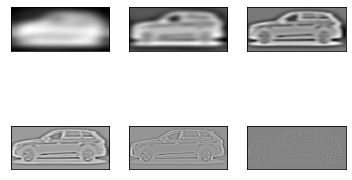

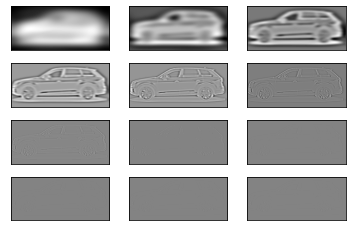

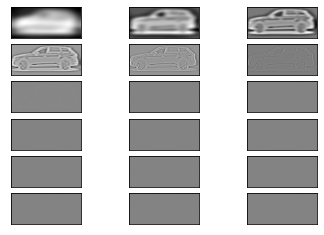

In [7]:
for i in range(3):
    plt.figure()
    for j in range(layers[i]):
        plt.subplot(2*(i+1),3,j+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(audi_laplacian[i][j], cmap='gray')
    plt.show()

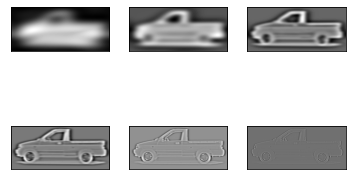

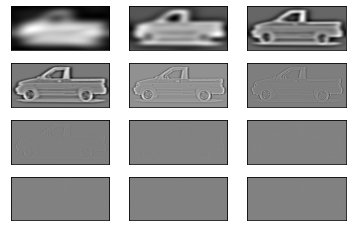

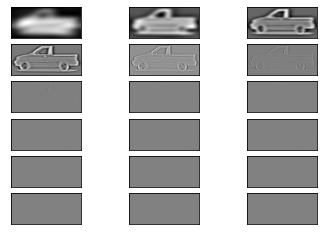

In [8]:
for i in range(3):
    plt.figure()
    for j in range(layers[i]):
        plt.subplot(2*(i+1),3,j+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(saipa_laplacian[i][j], cmap='gray')
    plt.show()

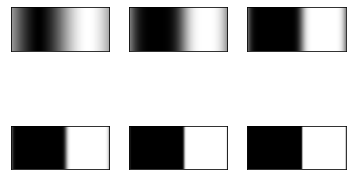

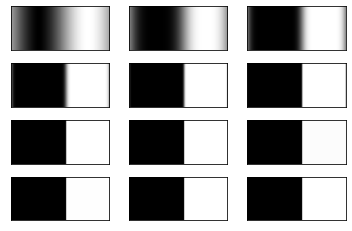

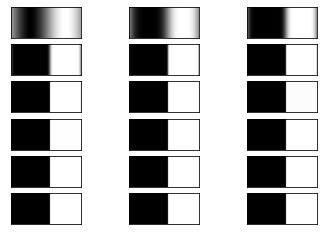

In [9]:
for i in range(3):
    plt.figure()
    for j in range(layers[i]):
        plt.subplot(2*(i+1),3,j+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(mask_gradient[i][j], cmap='gray')
    plt.show()

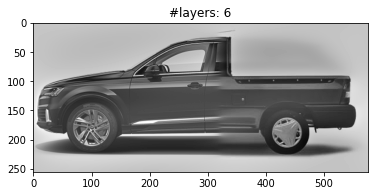

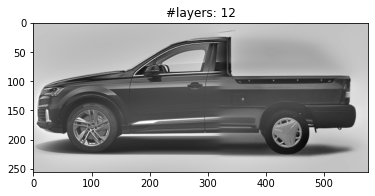

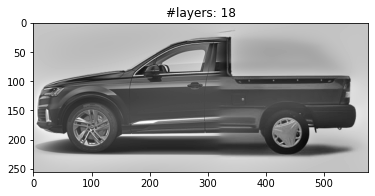

In [10]:
audi_saipa = []
for l in range(len(layers)):
    au_sp = combine(mask_gradient[l], saipa_laplacian[l], audi_laplacian[l], layers[l])
    audi_saipa.append(au_sp)
    plt.title('#layers: '+str(layers[l]))
    plt.imshow(au_sp, cmap='gray')
    plt.show()